In [5]:
import pandas as pd
from ydata_profiling import ProfileReport
df = pd.read_csv("Feature_engin_treated.csv")

### Rapport profiling des features enginered

In [6]:

# Charger le dataset
df = pd.read_csv('Feature_engin_treated.csv')

# Générer le rapport de profiling
report = ProfileReport(df)

# Sauvegarder le rapport au format HTML
report.to_file('rapport_engin.html')


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
df.head()

,Customer ID,AverageAmount,TotalAmount,TimeDiff,R,F,M,RFM
0,12346.0,-1.100851,-51.74,8.543478,1.0,2.0,3.0,123.0
1,12347.0,22.169054,4921.53,1.805430,4.0,3.0,3.0,433.0
2,12348.0,39.596078,2019.40,7.240000,1.0,4.0,4.0,144.0
3,12349.0,24.469667,4404.54,3.994413,3.0,4.0,2.0,342.0
4,12350.0,19.670588,334.40,0.000000,1.0,4.0,4.0,144.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5942 entries, 0 to 5941
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer ID    5942 non-null   float64
 1   AverageAmount  5942 non-null   float64
 2   TotalAmount    5942 non-null   float64
 3   TimeDiff       5791 non-null   float64
 4   R              5942 non-null   float64
 5   F              5942 non-null   float64
 6   M              5942 non-null   float64
 7   RFM            5942 non-null   float64
dtypes: float64(8)
memory usage: 371.5 KB


### Methode du coude

In [16]:
df_cleansed = df.dropna()
df_cleansed.isna().sum()

Customer ID      0
AverageAmount    0
TotalAmount      0
TimeDiff         0
R                0
F                0
M                0
RFM              0
dtype: int64

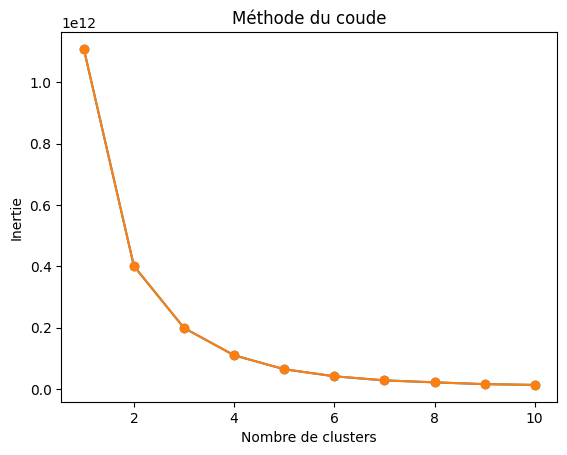

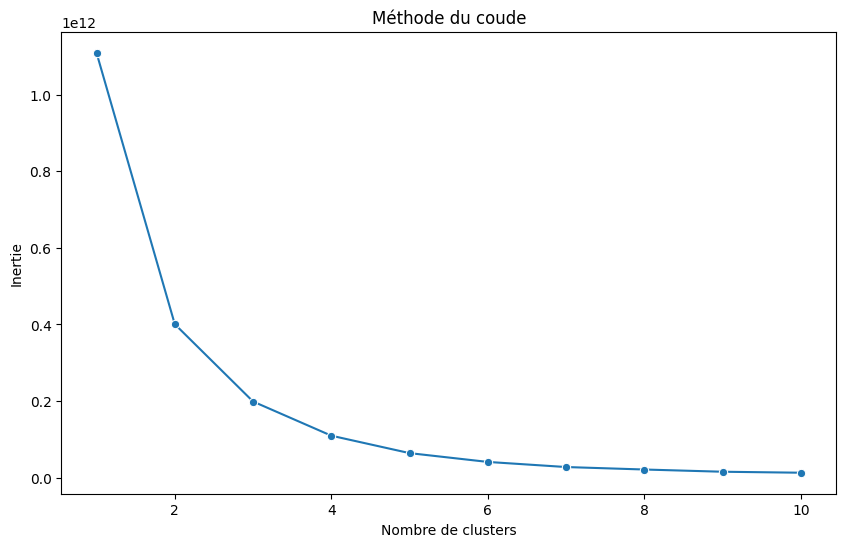

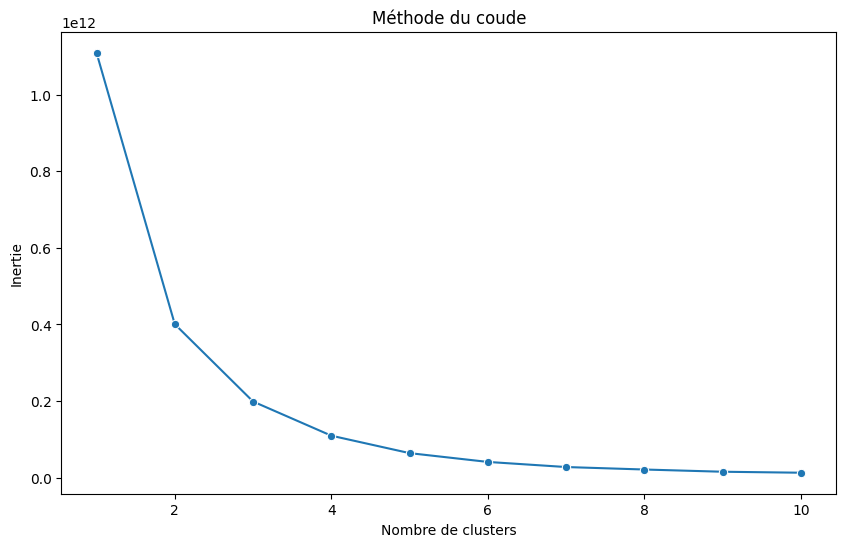

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

%matplotlib inline

columns = ['AverageAmount', 'TotalAmount', 'TimeDiff', 'R', 'F', 'M', 'RFM']
data = df_cleansed[columns]

inertias = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
sns.lineplot(x=range(1, 11), y=inertias, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude')
plt.show()


### Clustering

In [41]:
df_cleansed = df.dropna()
df_cleansed.isna().sum()

Customer ID      0
AverageAmount    0
TotalAmount      0
TimeDiff         0
R                0
F                0
M                0
RFM              0
dtype: int64

In [44]:
df_cleansed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5791 entries, 0 to 5941
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer ID    5791 non-null   float64
 1   AverageAmount  5791 non-null   float64
 2   TotalAmount    5791 non-null   float64
 3   TimeDiff       5791 non-null   float64
 4   R              5791 non-null   float64
 5   F              5791 non-null   float64
 6   M              5791 non-null   float64
 7   RFM            5791 non-null   float64
dtypes: float64(8)
memory usage: 407.2 KB


In [42]:
df_cleansed.shape

(5791, 8)

In [78]:
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Charger le dataset


# Sélectionner les colonnes à utiliser pour le clustering
columns = ['AverageAmount', 'TotalAmount', 'TimeDiff', 'R', 'F', 'M', 'RFM']
data = df_cleansed[columns]

# Créer le pipeline de standardisation et clustering
pipeline = make_pipeline(StandardScaler(), KMeans(n_clusters=4, max_iter=100,random_state=42))

# Effectuer le clustering
pipeline.fit(data)

# Obtenir les labels de cluster pour chaque échantillon
labels = pipeline.predict(data)

# Ajouter les labels de cluster au DataFrame
df_cleansed['Cluster'] = labels

# Afficher le DataFrame avec les labels de cluster
# print(df_cleansed.head())





/tmp/ipykernel_23112/2458600017.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleansed['Cluster'] = labels


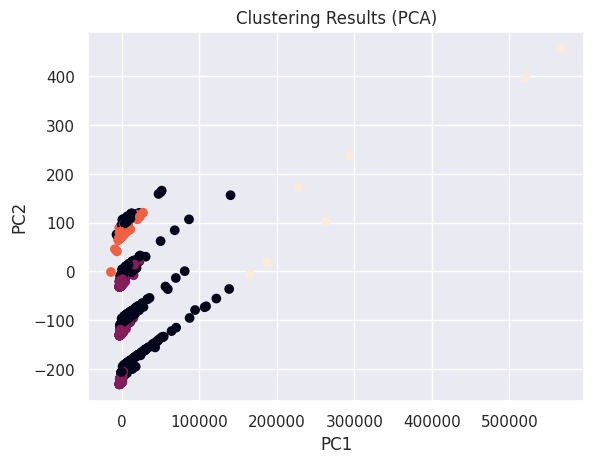

In [88]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clustering Results (PCA)')
plt.show()


In [70]:
df_cleansed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5791 entries, 0 to 5941
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer ID    5791 non-null   float64
 1   AverageAmount  5791 non-null   float64
 2   TotalAmount    5791 non-null   float64
 3   TimeDiff       5791 non-null   float64
 4   R              5791 non-null   float64
 5   F              5791 non-null   float64
 6   M              5791 non-null   float64
 7   RFM            5791 non-null   float64
 8   Cluster        5791 non-null   int32  
dtypes: float64(8), int32(1)
memory usage: 429.8 KB


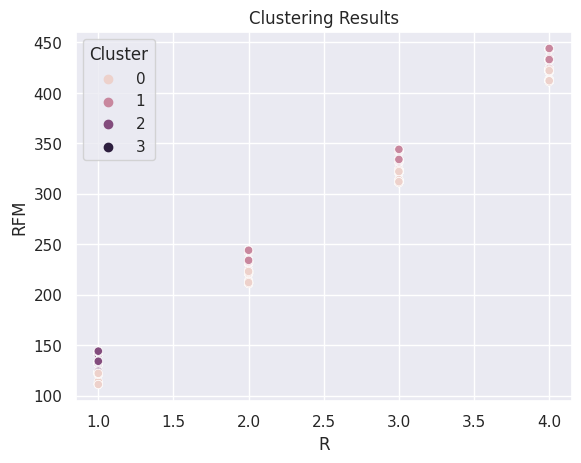

In [87]:
sns.scatterplot(x='R', y='RFM', hue='Cluster', data=df_cleansed)
plt.xlabel('R')
plt.ylabel('RFM')
plt.title('Clustering Results')
plt.show()

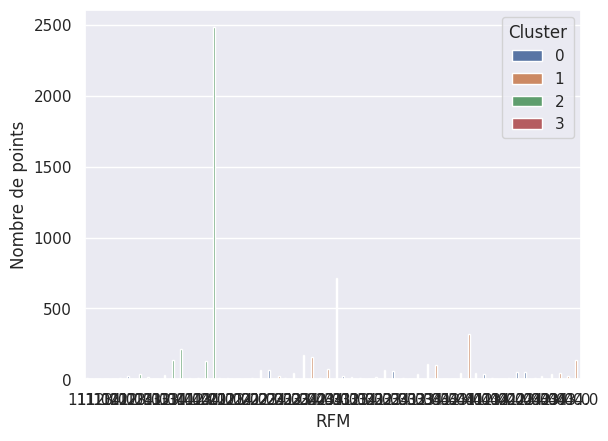

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

# Créer un graphique à barres pour chaque cluster en fonction du RFM
sns.countplot(x='RFM', hue='Cluster', data=df_cleansed)

# Ajouter des labels aux axes
plt.xlabel('RFM')
plt.ylabel('Nombre de points')

# Afficher la légende
plt.legend(title='Cluster')

# Afficher le graphique
plt.show()


In [55]:
df_cleansed

,Customer ID,AverageAmount,TotalAmount,TimeDiff,R,F,M,RFM,Cluster
0,12346.0,-1.100851,-51.74,8.543478,1.0,2.0,3.0,123.0,0
1,12347.0,22.169054,4921.53,1.805430,4.0,3.0,3.0,433.0,1
2,12348.0,39.596078,2019.40,7.240000,1.0,4.0,4.0,144.0,0
3,12349.0,24.469667,4404.54,3.994413,3.0,4.0,2.0,342.0,1
4,12350.0,19.670588,334.40,0.000000,1.0,4.0,4.0,144.0,0
...,...,...,...,...,...,...,...,...,...
5937,18283.0,2.841045,2664.90,0.687300,4.0,2.0,2.0,422.0,2
5938,18284.0,15.057931,436.68,0.071429,1.0,4.0,4.0,144.0,0
5939,18285.0,35.583333,427.00,0.000000,1.0,4.0,4.0,144.0,0
5940,18286.0,16.977571,1188.43,3.565217,1.0,4.0,4.0,144.0,0


In [25]:
df.isna().sum()

Customer ID        0
AverageAmount      0
TotalAmount        0
TimeDiff         151
R                  0
F                  0
M                  0
RFM                0
dtype: int64